# Name : Vivek Dhaked 

# Task : 2

# Sub  : Predict Optimum number of cluster  Data Set

## K - Mean CLustring  - The k-mean clustring algorithim will catergorize the items into k groups of similarity . to calculate that similarity ,we will use the k mean unsupervised learning algorithm.

### steps 

#### 1 Initialize k point ,called mean .
#### 2 Categorize each item to its closest mean and weupdate the mean co-ordinates, which are the average of the  items categorized mean so far.
#### 3 Repeat the process for given number of iterations and at the end we got our cluster.

In [31]:
#Import Python libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

In [32]:
# import in build iris dataset
iris = datasets.load_iris()


#convert dataset into data frame 

df = pd.DataFrame(iris.data,columns = iris.feature_names)

#Head of data frame / upper five  rows of data frame

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
#desciption of dataframe
df.describe

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [34]:
#Check null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [35]:
df.keys()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

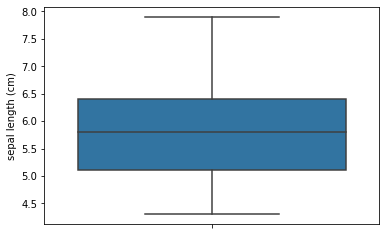

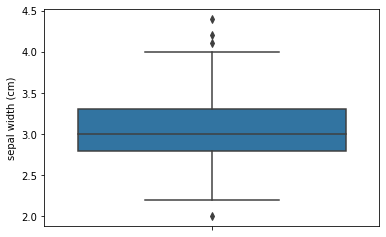

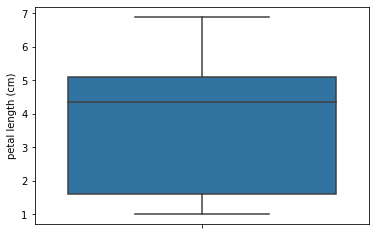

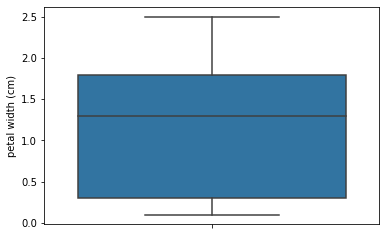

In [36]:
# TO find Outliers
colms = df.columns
for i in colms:
    sns.boxplot(y=df[i])
    plt.show()

#After observig  box plot we notice that there are outliers in "sepal width"

In [37]:
# Remove outliers from 'sepal widhth'
a1 = df['sepal width (cm)'].quantile(0.25)
a3 = df['sepal width (cm)'].quantile(0.75)
a  = a3-a1
df = df[(df['sepal width (cm)'] >= a1-1.5*a) & (df['sepal width (cm)'] <= a3+1.5*a)]
df.shape # find rows and column after treating outliers

(146, 4)

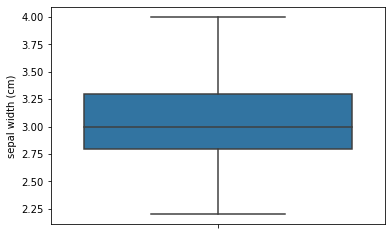

In [38]:
#Box plot of sepal width (cm) after treatment 
sns.boxplot(y=df['sepal width (cm)'])
plt.show()

In [39]:
from sklearn.cluster import KMeans

In [40]:
#To find the optimal no. of cluster
cluster_range = range(1,20)
cluster_errors = []

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster, n_init = 10)
    clusters.fit(df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({'num_cluster': cluster_range, 'cluster_errors': cluster_errors})
clusters_df[0:20]

,num_cluster,cluster_errors
0,1,655.601233
1,2,143.891875
2,3,73.478692
3,4,53.267005
4,5,42.510762
5,6,36.597858
6,7,31.830052
7,8,28.384459
8,9,26.596625
9,10,24.866005


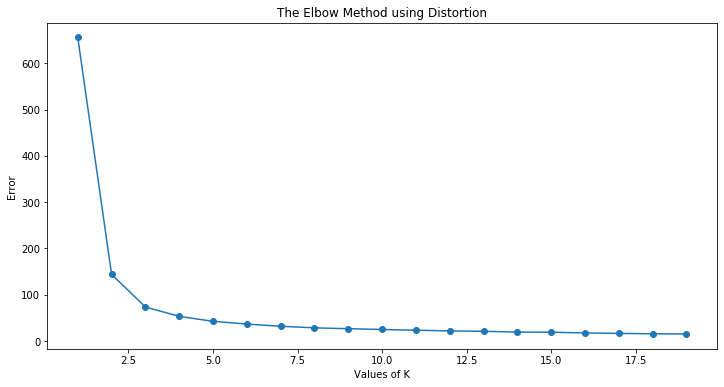

In [41]:
#Ploting elbow curve or sree to find the no. of cluster
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_cluster, clusters_df.cluster_errors, marker = 'o') 
plt.xlabel('Values of K') 
plt.ylabel('Error') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [42]:
# Creating object of the model and fitting it
model = KMeans(n_clusters=3, max_iter=300)
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
#analysis of cluster found
df.index = pd.RangeIndex(len(df.index))
df_km = pd.concat([df, pd.Series(model.labels_)], axis=1)
df_km.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)','ClusterID' ]

km_clusters_Slength = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'sepal length (cm)':'mean'}))
km_clusters_Swidth = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'sepal width (cm)':'mean'}))
km_clusters_Plength = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'petal length (cm)':'mean'}))
km_clusters_Pwidth = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'petal width (cm)':'mean'}))

In [44]:
df2 = pd.concat([pd.Series(['Iris-setosa','Iris-versicolour','Iris-verginica']), km_clusters_Slength, km_clusters_Swidth, km_clusters_Plength, km_clusters_Pwidth
                ], axis=1)
df2.columns = ['ClusterID','sepal length (cm)_mean','sepal width (cm)_mean','petal length (cm)_mean',
               'petal width (cm)_mean']
df2.head()

,ClusterID,sepal length (cm)_mean,sepal width (cm)_mean,petal length (cm)_mean,petal width (cm)_mean
0,Iris-setosa,5.916393,2.760656,4.408197,1.440984
1,Iris-versicolour,4.976596,3.376596,1.461702,0.246809
2,Iris-verginica,6.850000,3.073684,5.742105,2.071053


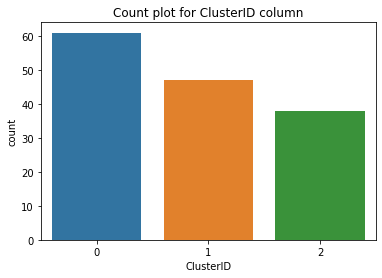

In [45]:
sns.countplot(x=df_km.ClusterID)
plt.title('Count plot for ClusterID column')
plt.show()

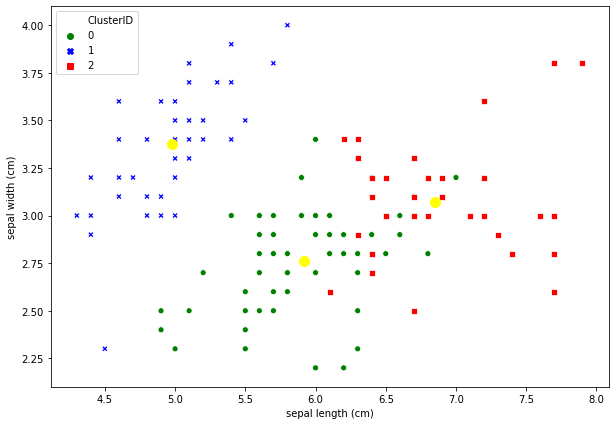

In [46]:
# Scatter plot to visualize the clusters
plt.figure(figsize=(10,7))
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)', data=df_km, hue='ClusterID',style='ClusterID', palette=['green','blue','red'])

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.show()